In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# Generate random data points
n_samples = 300  # Total points
n_features = 2   # Points in 2D space
n_clusters = 3   # Number of clusters to find

data, _ = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)

Steps for K-means Clustering
1. **Initialize Centroids**: Randomly select points as initial centroids.
2. **Assign Points to Nearest Centroid**: Each point is assigned to the nearest centroid.
3. **Update Centroids**: Move centroids to the mean position of their assigned points.
4. **Repeat Until Convergence**.

In [3]:
# Number of clusters (K)
K = 3

In [4]:
# Randomly initialize centroids by selecting K random points from the dataset
centroids = data[np.random.choice(data.shape[0], K, replace=False)]


In [5]:
def plot_clusters(data, centroids, labels, iteration):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x')
    plt.title(f"Iteration {iteration}")
    plt.show()

Steps for implementing K-means clustering
1. **Calculate Distance and Assign Labels**: For each point, find the nearest centroid.
2. **Update Centroids**: Move each centroid to the average location of all assigned points.
3. **Repeat** until no points change clusters (or for a fixed number of iterations).

In [6]:
def kmeans(data, K, max_iters=10):
    # Initialize centroids
    centroids = data[np.random.choice(data.shape[0], K, replace=False)]
    for i in range(max_iters):
        # Step 1: Assign labels to each point based on centroids
        labels = np.array([np.argmin([np.linalg.norm(point - centroid) for centroid in centroids]) for point in data])

        # Plot the current state
        plot_clusters(data, centroids, labels, i+1)

        # Step 2: Calculate new centroids from the labels
        new_centroids = np.array([data[labels == k].mean(axis=0) for k in range(K)])

        # Stop if centroids do not change
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, labels

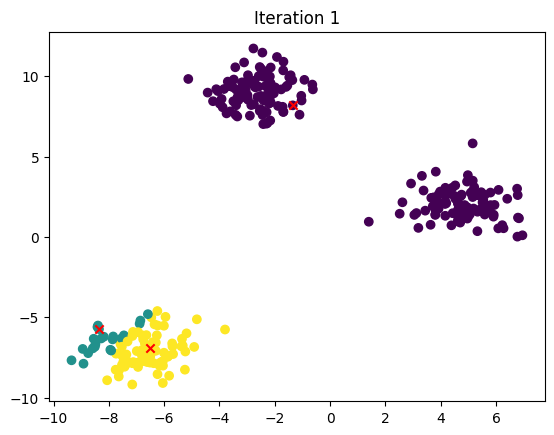

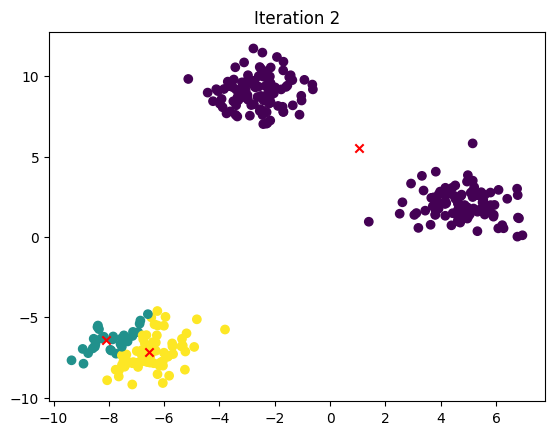

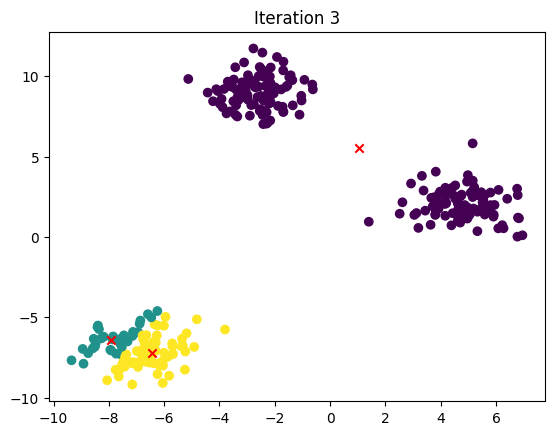

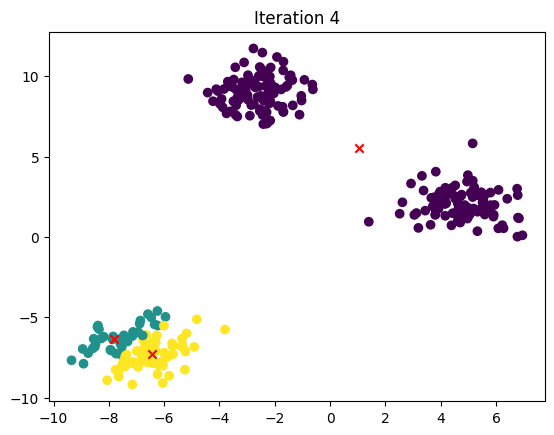

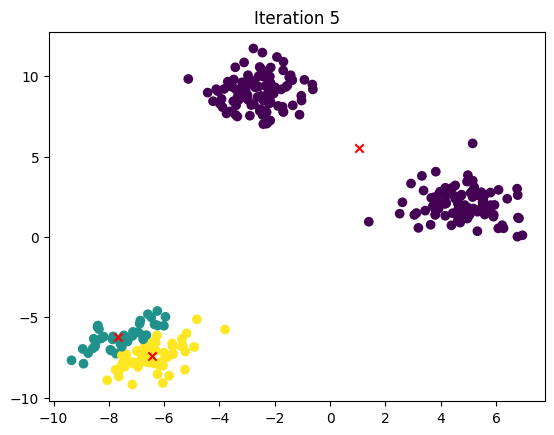

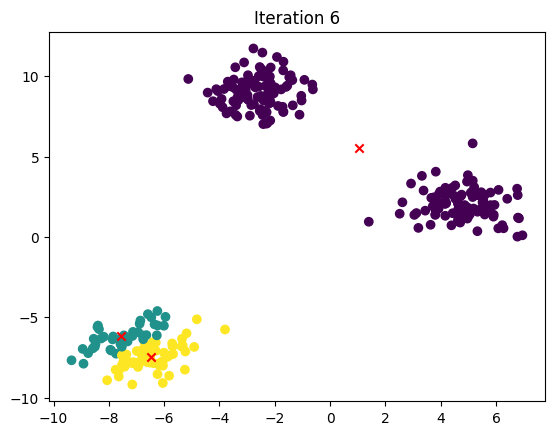

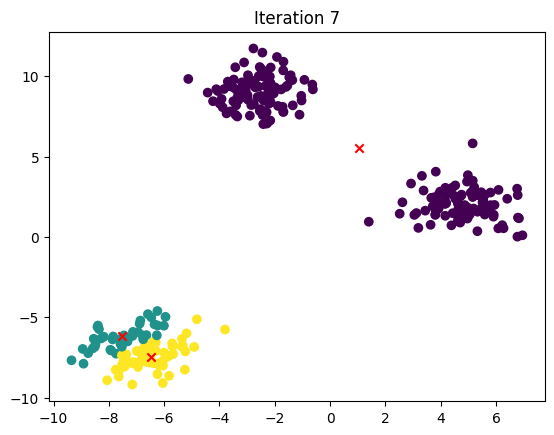

In [7]:
# Run K-Means on the dataset
final_centroids, final_labels = kmeans(data, K)

Experimenting with different values of K

\nClustering with K=2


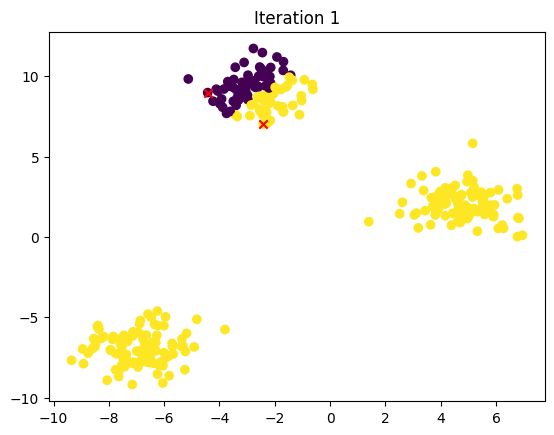

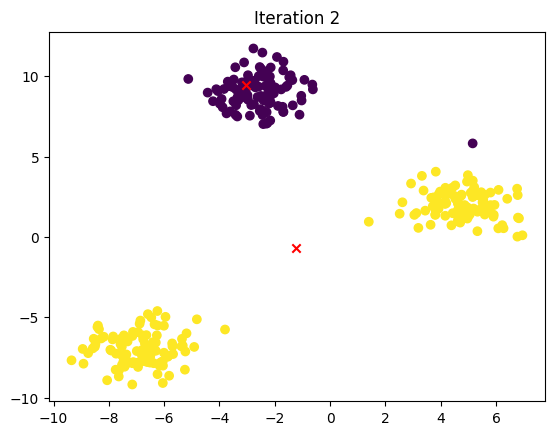

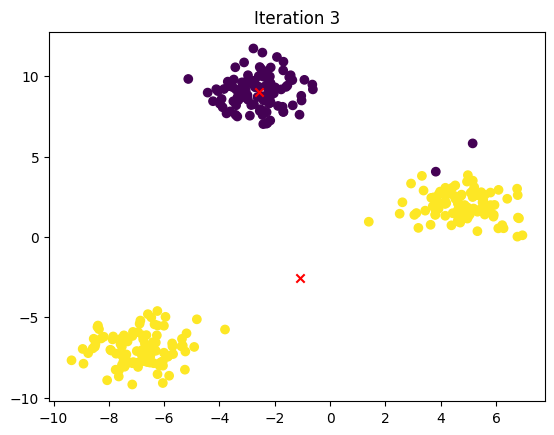

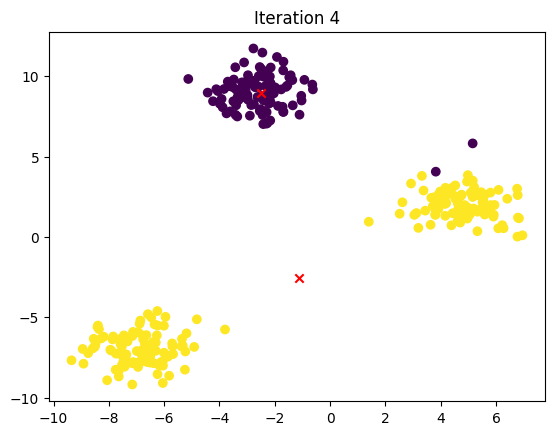

\nClustering with K=3


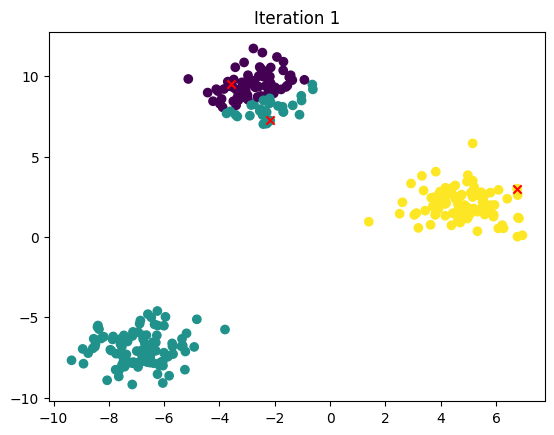

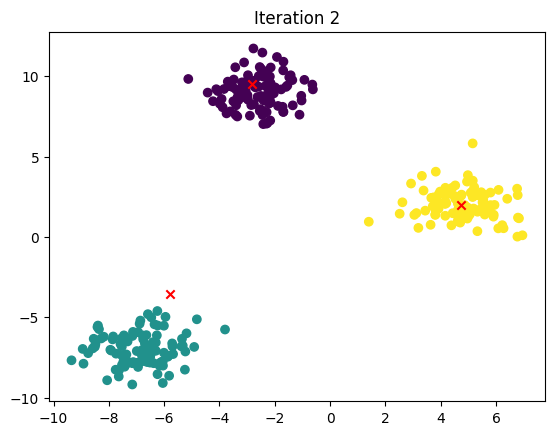

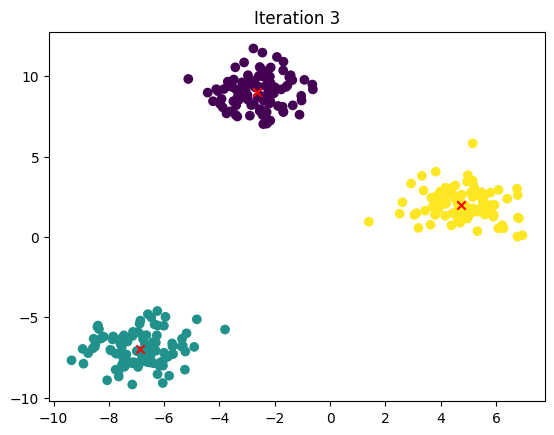

\nClustering with K=4


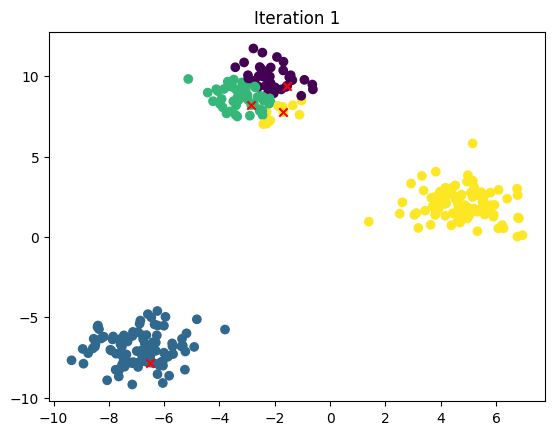

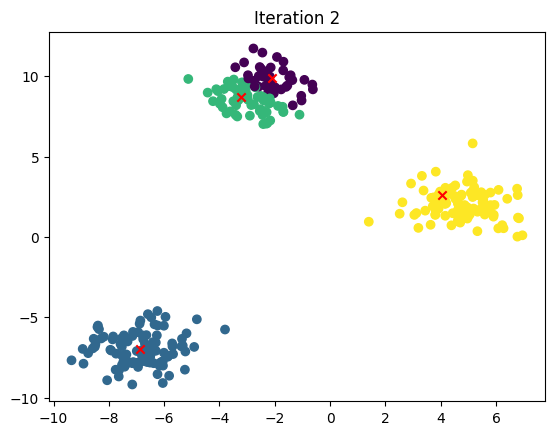

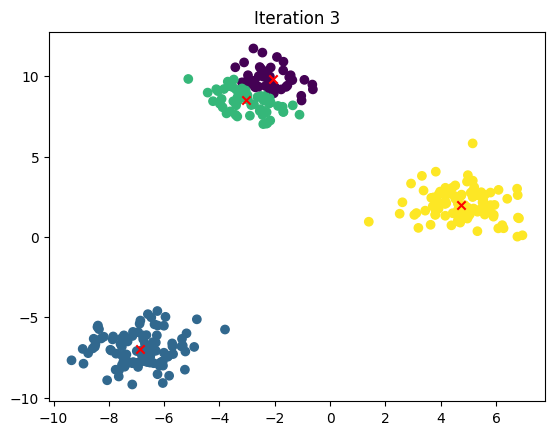

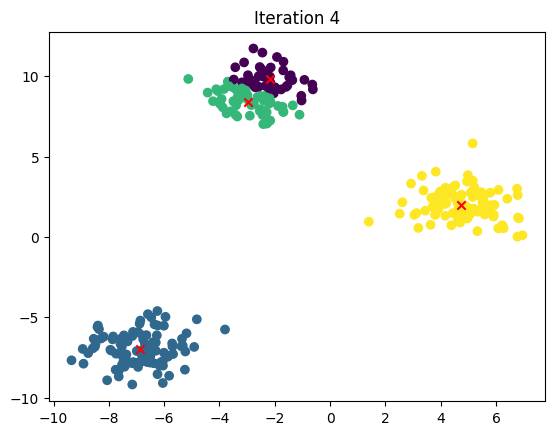

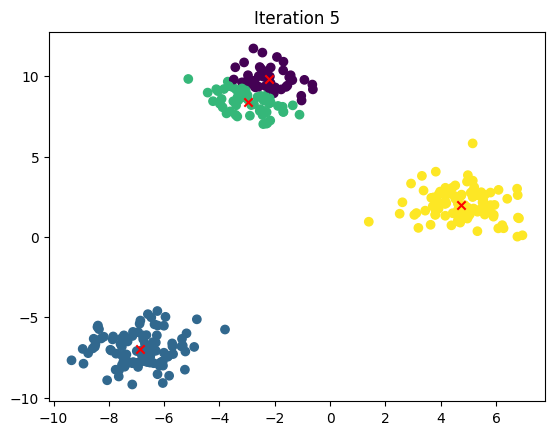

\nClustering with K=5


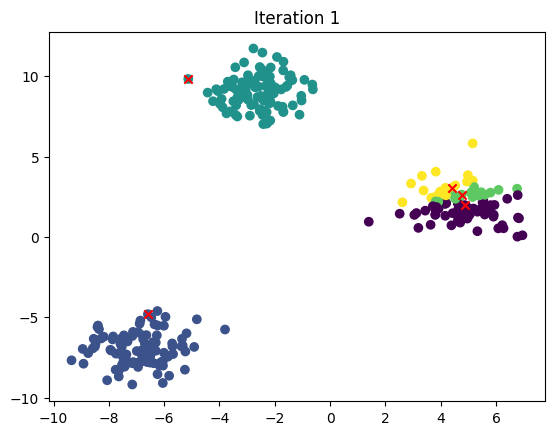

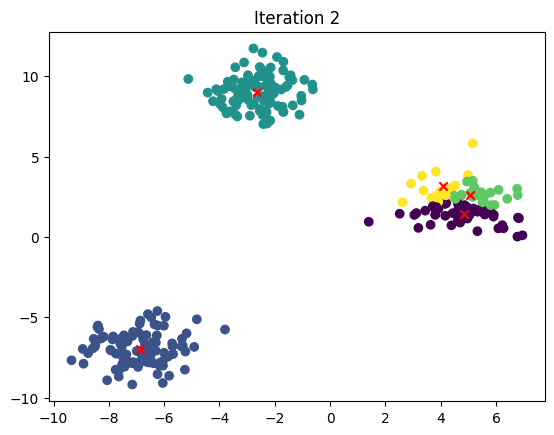

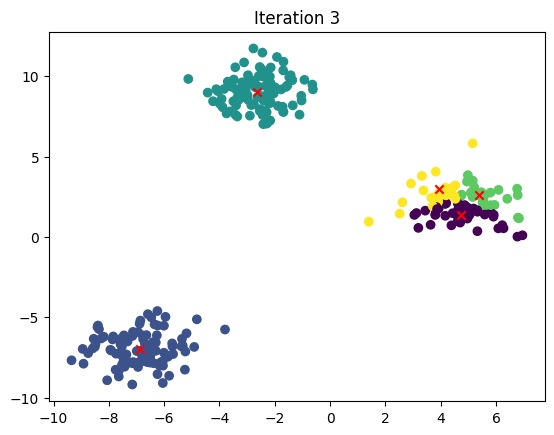

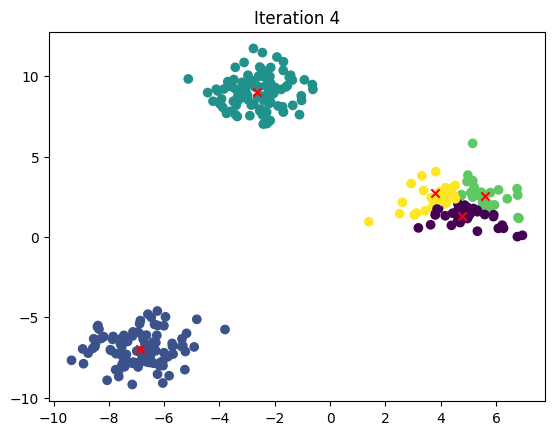

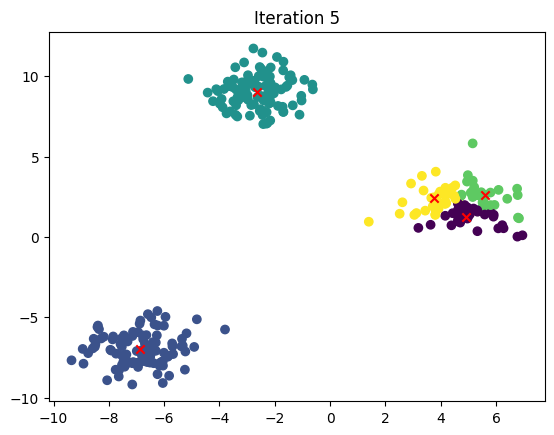

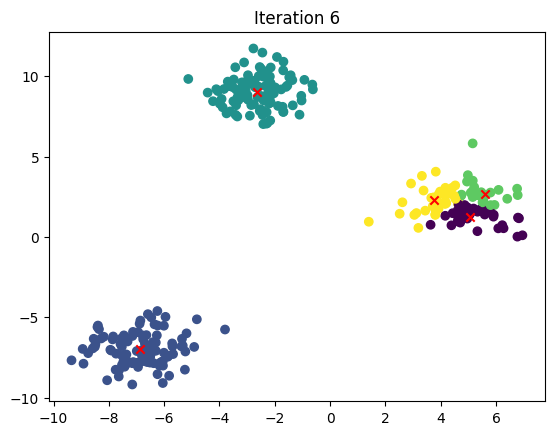

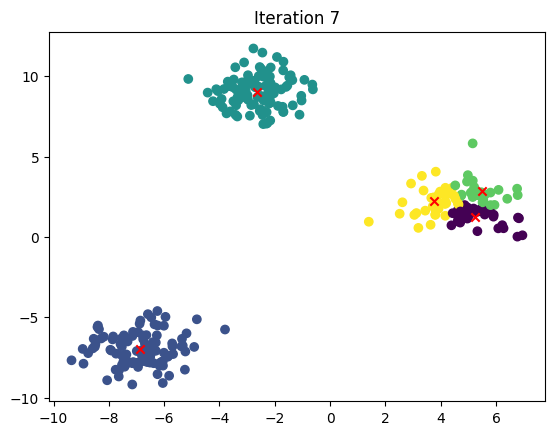

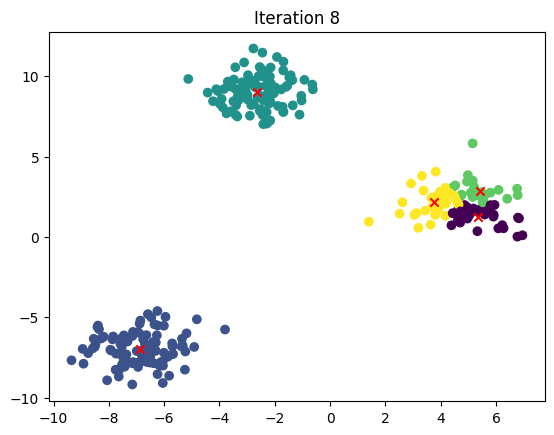

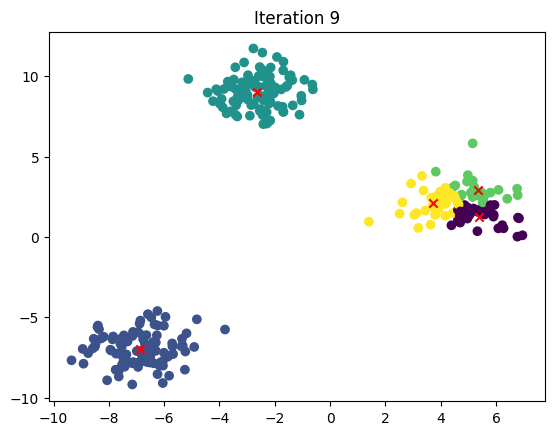

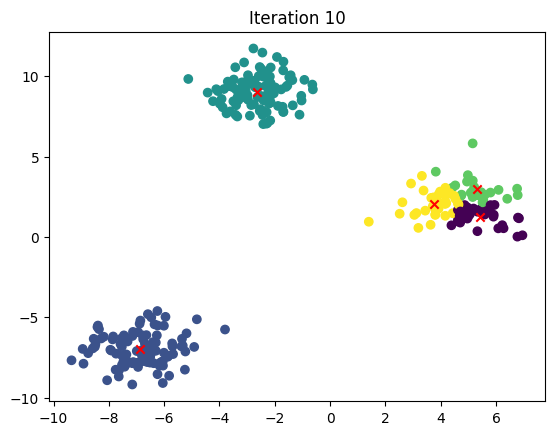

In [8]:
# Set different values for K and re-run the algorithm
for K in [2, 3, 4, 5]:
    print(f"\\nClustering with K={K}")
    final_centroids, final_labels = kmeans(data, K)

Comparing with Scikit-Learn’s K-Means Implementation

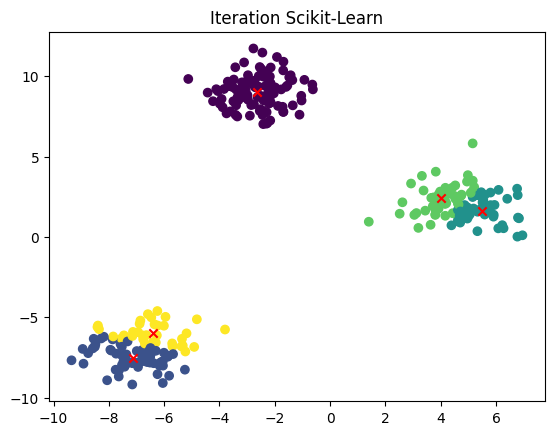

In [9]:
from sklearn.cluster import KMeans

# Use Scikit-Learn's KMeans
kmeans = KMeans(n_clusters=K, random_state=42).fit(data)
sklearn_centroids = kmeans.cluster_centers_
sklearn_labels = kmeans.labels_

# Plot Scikit-Learn's results
plot_clusters(data, sklearn_centroids, sklearn_labels, "Scikit-Learn")